### 신발 분류 - 다중(Ballet, Boat, Brogue, Clog, Sneaker)
- https://www.kaggle.com/datasets/utkarshsaxenadn/shoes-classification-dataset-13k-images

#### 사전 훈련 모델로 예측먼저 해보기 - 유사도 판단

In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16, decode_predictions
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_input_resnet50
from tensorflow.keras.applications.xception import Xception, preprocess_input as preprocess_input_xception

# 모델 로드
vgg16_model = VGG16(weights='imagenet')
mobilenet_model = MobileNet(weights='imagenet')
resnet50_model = ResNet50(weights='imagenet')
xception_model = Xception(weights='imagenet')

# 이미지 경로
image_paths = [
    './datasets/Ballet Flat-Test (1).jpeg',
    './datasets/Sneaker-Test (21).jpeg',
    './datasets/Boat Shoe-Test (1).jpeg',
    './datasets/Brogue Shoe-Test (1).jpeg',
    './datasets/Clog-Test (2).jpeg'
]

# 각 이미지에 대해 모든 모델로 예측 수행
for path in image_paths:
    print(f"Processing: {path}")
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    
    # VGG16
    img_preprocessed = preprocess_input(img_batch)
    preds_vgg16 = vgg16_model.predict(img_preprocessed)
    print("VGG16 Prediction:", decode_predictions(preds_vgg16, top=3)[0])
    
    # MobileNet
    img_preprocessed_mobilenet = preprocess_input_mobilenet(img_batch)
    preds_mobilenet = mobilenet_model.predict(img_preprocessed_mobilenet)
    print("MobileNet Prediction:", decode_predictions(preds_mobilenet, top=3)[0])
    
    # ResNet50
    img_preprocessed_resnet50 = preprocess_input_resnet50(img_batch)
    preds_resnet50 = resnet50_model.predict(img_preprocessed_resnet50)
    print("ResNet50 Prediction:", decode_predictions(preds_resnet50, top=3)[0])
    
    # Xception
    img = image.load_img(path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed_xception = preprocess_input_xception(img_batch)
    preds_xception = xception_model.predict(img_preprocessed_xception)
    print("Xception Prediction:", decode_predictions(preds_xception, top=3)[0])
    
    print("\n")

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 81s 1us/step
91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 73s 1us/step
Processing: ./datasets/Ballet Flat-Test (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
VGG16 Prediction: [('n04200800', 'shoe_shop', 0.41949403), ('n01704323', 'triceratops', 0.16794689), ('n03047690', 'clog', 0.08649527)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
MobileNet Prediction: [('n04200800', 'shoe_shop', 0.48647988), ('n03498962', 'hatchet', 0.38913006), ('n03680355', 'Loafer', 0.03520538)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
ResNet50 Prediction: [('n03729826', 'matchstick', 0.112563565), ('n03637318', 'lampshade', 0.04612294), ('n04286575', 'spotlight', 0.04598678)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Xception Prediction: [('n03498962', 'hatchet', 0.98841745), ('n03944341', 'pinwheel', 0.0024613736), ('n04200800', 'shoe_shop', 0.0009952153)]


Processing: ./datasets/Sneaker-Test (21).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/ste

### 📍 사전 예측 결과
- vgg, mobilenet, resnet50, xception중 가장 높은 유사도를 보이는 mobilenet 모델을 이용하여 학습을 진행해보고자 한다.
- 유사도 평균: 0.6124

| 모델    | 카테고리 | 유사도 |
|---------|-------------|--------|
| mobilenet | Ballet | 0.4864 |
|           | Sneaker | 0.7948 |
|           | Boat | 0.9833 |
|           | Brogue | 0.5485 |
|           | Clog | 0.2488 |

### 데이터 세트 나누기

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 150
BATCH_SIZE = 64

idg = ImageDataGenerator()

train_dir = './datasets/Shoes Dataset/Train'
train_generator = idg.flow_from_directory(train_dir,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical', 
                                             shuffle=True)

val_dir = './datasets/Shoes Dataset/Valid/'
val_generator = idg.flow_from_directory(val_dir,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

test_dir = './datasets/Shoes Dataset/Test/'
test_generator = idg.flow_from_directory(test_dir,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 10000 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.
Found 1215 images belonging to 5 classes.
{'Ballet Flat': 0, 'Boat': 1, 'Brogue': 2, 'Clog': 3, 'Sneaker': 4}
{'Ballet Flat': 0, 'Boat': 1, 'Brogue': 2, 'Clog': 3, 'Sneaker': 4}
{'Ballet Flat': 0, 'Boat': 1, 'Brogue': 2, 'Clog': 3, 'Sneaker': 4}


In [12]:
target_name = {v: k for k, v in train_generator.class_indices.items()}
target_name

{0: 'Ballet Flat', 1: 'Boat', 2: 'Brogue', 3: 'Clog', 4: 'Sneaker'}

In [14]:
train_target_names = []
val_target_names = []
test_target_names = []

for target in train_generator.classes:
    train_target_names.append(target_name[target])

for target in val_generator.classes:
    val_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])
    
print(train_target_names.__len__(), val_target_names.__len__(), test_target_names.__len__())

10000 2500 1215


In [15]:
import pandas as pd

train_df = pd.DataFrame({'file_paths':train_generator.filepaths, 'target_names': train_target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

val_df = pd.DataFrame({'file_paths': val_generator.filepaths, 'target_names': val_target_names, 'targets': val_generator.classes})
val_df.file_paths = val_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(train_df)
display(val_df)
display(test_df)

file_paths target_names  targets
0     ./datasets/Shoes Dataset/Train/Ballet Flat/Bal...  Ballet Flat        0
1     ./datasets/Shoes Dataset/Train/Ballet Flat/Bal...  Ballet Flat        0
2     ./datasets/Shoes Dataset/Train/Ballet Flat/Bal...  Ballet Flat        0
3     ./datasets/Shoes Dataset/Train/Ballet Flat/Bal...  Ballet Flat        0
4     ./datasets/Shoes Dataset/Train/Ballet Flat/Bal...  Ballet Flat        0
...                                                 ...          ...      ...
9995  ./datasets/Shoes Dataset/Train/Sneaker/Sneaker...      Sneaker        4
9996  ./datasets/Shoes Dataset/Train/Sneaker/Sneaker...      Sneaker        4
9997  ./datasets/Shoes Dataset/Train/Sneaker/Sneaker...      Sneaker        4
9998  ./datasets/Shoes Dataset/Train/Sneaker/Sneaker...      Sneaker        4
9999  ./datasets/Shoes Dataset/Train/Sneaker/Sneaker...      Sneaker        4

[10000 rows x 3 columns]

file_paths target_names  targets
0     ./datasets/Shoes Dataset/Valid/Ballet Flat/Bal...  Ballet Flat        0
1     ./datasets/Shoes Dataset/Valid/Ballet Flat/Bal...  Ballet Flat        0
2     ./datasets/Shoes Dataset/Valid/Ballet Flat/Bal...  Ballet Flat        0
3     ./datasets/Shoes Dataset/Valid/Ballet Flat/Bal...  Ballet Flat        0
4     ./datasets/Shoes Dataset/Valid/Ballet Flat/Bal...  Ballet Flat        0
...                                                 ...          ...      ...
2495  ./datasets/Shoes Dataset/Valid/Sneaker/Sneaker...      Sneaker        4
2496  ./datasets/Shoes Dataset/Valid/Sneaker/Sneaker...      Sneaker        4
2497  ./datasets/Shoes Dataset/Valid/Sneaker/Sneaker...      Sneaker        4
2498  ./datasets/Shoes Dataset/Valid/Sneaker/Sneaker...      Sneaker        4
2499  ./datasets/Shoes Dataset/Valid/Sneaker/Sneaker...      Sneaker        4

[2500 rows x 3 columns]

file_paths target_names  targets
0     ./datasets/Shoes Dataset/Test/Ballet Flat/Ball...  Ballet Flat        0
1     ./datasets/Shoes Dataset/Test/Ballet Flat/Ball...  Ballet Flat        0
2     ./datasets/Shoes Dataset/Test/Ballet Flat/Ball...  Ballet Flat        0
3     ./datasets/Shoes Dataset/Test/Ballet Flat/Ball...  Ballet Flat        0
4     ./datasets/Shoes Dataset/Test/Ballet Flat/Ball...  Ballet Flat        0
...                                                 ...          ...      ...
1210  ./datasets/Shoes Dataset/Test/Sneaker/Sneaker-...      Sneaker        4
1211  ./datasets/Shoes Dataset/Test/Sneaker/Sneaker-...      Sneaker        4
1212  ./datasets/Shoes Dataset/Test/Sneaker/Sneaker-...      Sneaker        4
1213  ./datasets/Shoes Dataset/Test/Sneaker/Sneaker-...      Sneaker        4
1214  ./datasets/Shoes Dataset/Test/Sneaker/Sneaker-...      Sneaker        4

[1215 rows x 3 columns]

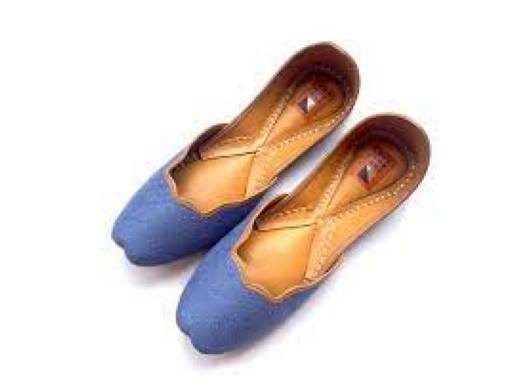

In [16]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[500]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [54]:
from tensorflow.keras.applications.mobilenet import preprocess_input

IMAGE_SIZE = 224
BATCH_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle=True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 10000 validated image filenames belonging to 5 classes.
Found 2500 validated image filenames belonging to 5 classes.
Found 1215 validated image filenames belonging to 5 classes.
{'Ballet Flat': 0, 'Boat': 1, 'Brogue': 2, 'Clog': 3, 'Sneaker': 4}
{'Ballet Flat': 0, 'Boat': 1, 'Brogue': 2, 'Clog': 3, 'Sneaker': 4}
{'Ballet Flat': 0, 'Boat': 1, 'Brogue': 2, 'Clog': 3, 'Sneaker': 4}


In [143]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 224
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [144]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# list 형식인 values만 가져오기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values   # CategoricalCrossEntropy

validation_file_paths = val_df['file_paths'].values
validation_targets = pd.get_dummies(val_df['targets']).values   # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values   # CategoricalCrossEntropy

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

# train 데이터 세트
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

In [145]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet': 
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(5, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [146]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(0.0001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_9808\4238399383.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_22[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,289 (8.86 MB)

 Trainable params: 2,288,177 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [147]:
history = model.fit(train_dataset, 
                        batch_size=BATCH_SIZE, 
                        epochs=20, 
                        validation_data=validation_dataset)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - acc: 0.3494 - loss: 1.6478 - val_acc: 0.6792 - val_loss: 0.8864
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - acc: 0.6979 - loss: 0.8445 - val_acc: 0.6972 - val_loss: 0.9514
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - acc: 0.7905 - loss: 0.6228 - val_acc: 0.7740 - val_loss: 0.7392
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - acc: 0.8381 - loss: 0.5084 - val_acc: 0.7936 - val_loss: 0.6948
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - acc: 0.8598 - loss: 0.4339 - val_acc: 0.7056 - val_loss: 1.0439
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - acc: 0.8759 - loss: 0.3881 - val_acc: 0.7668 - val_loss: 0.8332
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - acc: 0.8916 - loss: 0.3265 - val_acc: 0.7788 - val_loss: 0.8398
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - acc: 0.9069 - loss: 0.3048 - val_acc: 0.7984 - val_loss: 0.7554
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/

In [148]:
model.evaluate(test_dataset)

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - acc: 0.8445 - loss: 0.8761


[0.7159860134124756, 0.8699588179588318]

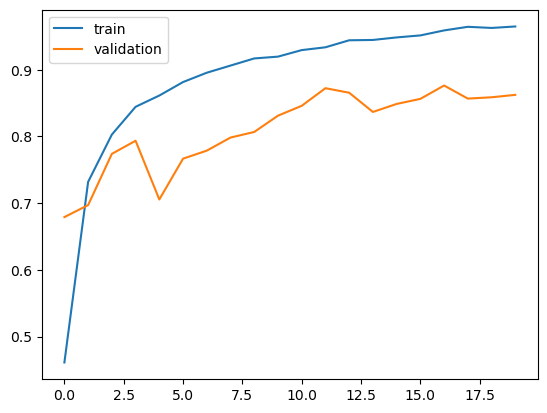

In [149]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


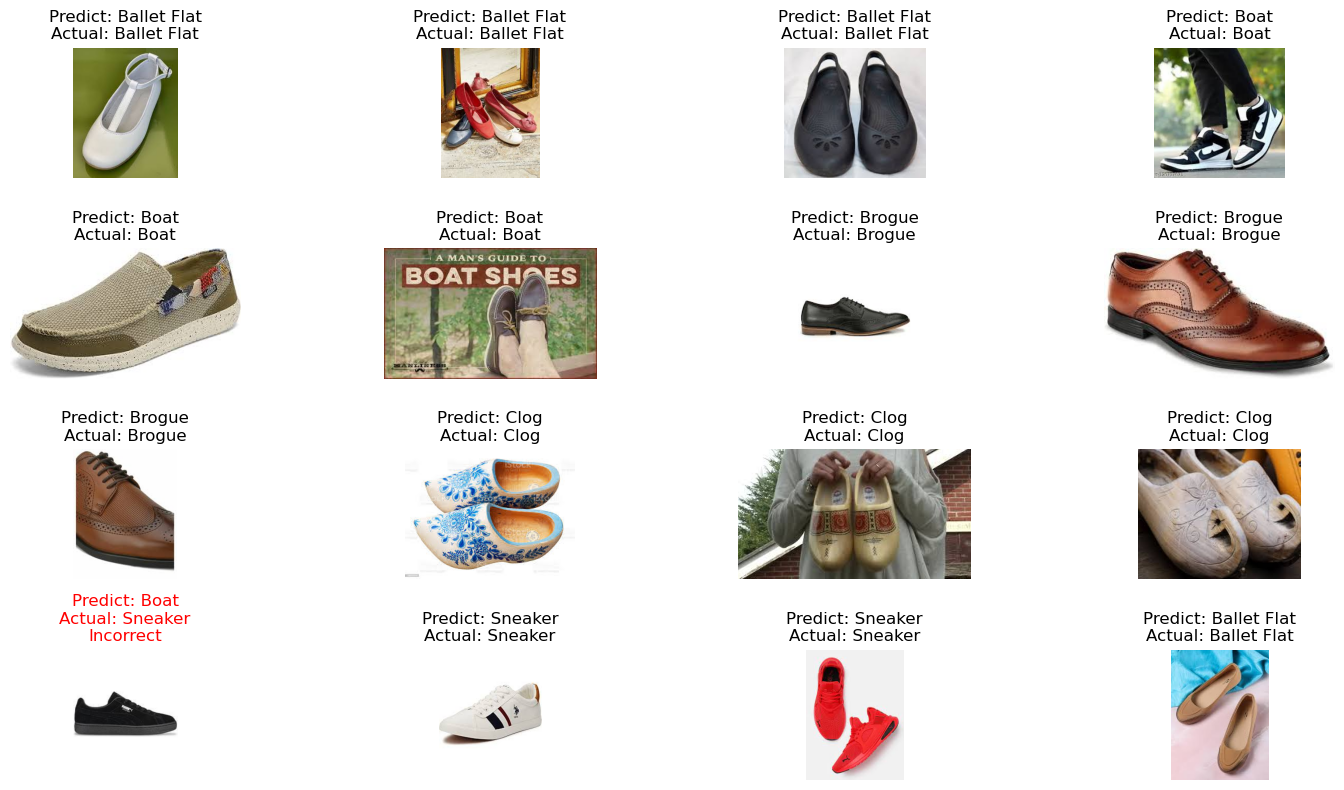

In [151]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet import preprocess_input

# 이미지 로드 및 전처리
IMAGE_DIR = './datasets/Shoes Dataset/Valid/'
IMAGE_SIZE = 224
class_names = ['Ballet Flat', 'Boat', 'Brogue', 'Clog', 'Sneaker']

def load_random_images(image_dir, class_names, num_images=16):
    images_per_class = num_images // len(class_names)
    remainder = num_images % len(class_names)

    images = []
    labels = []

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpeg')]
        selected_images = random.sample(all_images, min(images_per_class, len(all_images)))

        images.extend(selected_images)
        labels.extend([class_name] * len(selected_images))

    # 추가로 필요한 이미지를 무작위로 선택
    if remainder > 0:
        additional_images = []
        additional_labels = []
        for class_name in class_names:
            class_dir = os.path.join(image_dir, class_name)
            all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpeg')]
            additional_images.extend(random.sample(all_images, min(remainder, len(all_images))))
            additional_labels.extend([class_name] * min(remainder, len(all_images)))
            remainder -= len(additional_images)
            if remainder <= 0:
                break
        images.extend(additional_images)
        labels.extend(additional_labels)

    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 20개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=16)

# Predict and visualize the results
plt.figure(figsize=(15, 8))  
for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=8)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    # Visualize the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(4, 4, idx + 1) 
    plt.imshow(image)
    actual_class_name = random_labels[idx]
    title_text = f"Predict: {predicted_class_name}\nActual: {actual_class_name}"
    if predicted_class_name != actual_class_name:
        title_text += "\nIncorrect"
        plt.title(title_text, color='red')  # 틀린 예측은 빨간색으로 표시
    else:
        plt.title(title_text)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 📍미세조정없이 사전 훈련 모델인 mobilenet으로 학습한 결과
- 정화도가 0.9정도로 준수한 성능이였고, 실제 예측을 해보니 0.9정도로 보임을 확인했다.
- 또한, IMAGE_SIZE를 224로 크게 설정하고 다른 사전훈련 모델들(resnet, inception)에 비해서는 비교적 간단한 구조임에도 훈련 소요시간이 오래걸렸다.
- 모델의 성능을 높이기 위해 Dense를 높게 하고 대신 훈련 소요 시간을 적게 소요 되게끔 조정해보기 위해 fine_tuning을 해보고자한다.
| 데이터 세트 | 정확도 | 손실값   |
|-------------|--------|--------|
| 훈련 데이터 | 0.9661 | 0.1139 |
| 검증 데이터 | 0.8624 | 0.6607 |
| 테스트 데이터 | 0.8445 | 0.8761 |

### 2️⃣ Fine tuning 적용

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet': 
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(5, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [70]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_9808\2493179775.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_16[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,327,639 (8.88 MB)

 Trainable params: 2,293,527 (8.75 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [71]:
model.layers

[<InputLayer name=input_layer_16, built=True>,
 <Conv2D name=Conv1, built=True>,
 <BatchNormalization name=bn_Conv1, built=True>,
 <ReLU name=Conv1_relu, built=True>,
 <DepthwiseConv2D name=expanded_conv_depthwise, built=True>,
 <BatchNormalization name=expanded_conv_depthwise_BN, built=True>,
 <ReLU name=expanded_conv_depthwise_relu, built=True>,
 <Conv2D name=expanded_conv_project, built=True>,
 <BatchNormalization name=expanded_conv_project_BN, built=True>,
 <Conv2D name=block_1_expand, built=True>,
 <BatchNormalization name=block_1_expand_BN, built=True>,
 <ReLU name=block_1_expand_relu, built=True>,
 <ZeroPadding2D name=block_1_pad, built=True>,
 <DepthwiseConv2D name=block_1_depthwise, built=True>,
 <BatchNormalization name=block_1_depthwise_BN, built=True>,
 <ReLU name=block_1_depthwise_relu, built=True>,
 <Conv2D name=block_1_project, built=True>,
 <BatchNormalization name=block_1_project_BN, built=True>,
 <Conv2D name=block_2_expand, built=True>,
 <BatchNormalization name=bloc

In [115]:
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import layers

def fine_tune(datas, model_name, aug, preprocess):
    IMAGE_SIZE = 224
    BATCH_SIZE = 64
    
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            aug=aug, 
                            preprocess=mobilenet_preprocess_input)
    
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze
    # 분류기만 True
    for layer in model.layers[:-6]:
        layer.trainable = False

    # 1차 fit 진행
    model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=FIRST_EPOCHS, 
              validation_data=validation_dataset)

    # 배치 정규화만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    model.compile(optimizer=Adam(0.0001), loss=CategoricalCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, 
                        batch_size=BATCH_SIZE, 
                        epochs=SECOND_EPOCHS, 
                        validation_data=validation_dataset)

    return model, history

In [116]:
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values  

validation_file_paths = val_df['file_paths'].values
validation_targets = pd.get_dummies(val_df['targets']).values 

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values  

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

model, history = fine_tune((train_file_paths, train_targets,
          validation_file_paths, validation_targets,
          test_file_paths, test_targets),
         'mobilenet', 
          aug, 
          mobilenet_preprocess_input)

C:\Users\user\AppData\Local\Temp\ipykernel_9808\2493179775.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_21[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,327,639 (8.88 MB)

 Trainable params: 2,293,527 (8.75 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 318ms/step - acc: 0.4040 - loss: 1.4379 - val_acc: 0.7412 - val_loss: 0.7497
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 313ms/step - acc: 0.6716 - loss: 0.9049 - val_acc: 0.7696 - val_loss: 0.6612
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 320ms/step - acc: 0.7039 - loss: 0.8373 - val_acc: 0.7896 - val_loss: 0.6319
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 315ms/step - acc: 0.7256 - loss: 0.7774 - val_acc: 0.7924 - val_loss: 0.6108
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 316ms/step - acc: 0.7393 - loss: 0.7525 - val_acc: 0.8076 - val_loss: 0.5730
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 318ms/step - acc: 0.7365 - loss: 0.7511 - val_acc: 0.7992 - val_loss: 0.5899
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - acc: 0.7263 - loss: 0.7574 - val_acc: 0.7960 - val_loss: 0.5971
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 319ms/step - acc: 0.7523 - loss: 0.7157 - val_acc: 0.7888 - val_loss: 0.5909
Epoch 9/10
157/157 ━━━━━━━━━━━━━

In [117]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-6]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-6:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer_21 trainable: False
2 . Conv1 trainable: False
3 . bn_Conv1 trainable: False
4 . Conv1_relu trainable: False
5 . expanded_conv_depthwise trainable: False
6 . expanded_conv_depthwise_BN trainable: False
7 . expanded_conv_depthwise_relu trainable: False
8 . expanded_conv_project trainable: False
9 . expanded_conv_project_BN trainable: False
10 . block_1_expand trainable: False
11 . block_1_expand_BN trainable: False
12 . block_1_expand_relu trainable: False
13 . block_1_pad trainable: False
14 . block_1_depthwise trainable: False
15 . block_1_depthwise_BN trainable: False
16 . block_1_depthwise_relu trainable: False
17 . block_1_project trainable: False
18 . block_1_project_BN trainable: False
19 . block_2_expand trainable: False
20 . block_2_expand_BN trainable: False
21 . block_2_expand_relu trainable: False
22 . block_2_depthwise trainable: False
23 . block_2_depthwise_BN trainable: False
24 . block_2_depthwise_relu trainable: False
25 . block_2_project trainable: Fals

In [130]:
model.evaluate(test_dataset)

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - acc: 0.8300 - loss: 0.6342


[0.4613622725009918, 0.8798353672027588]

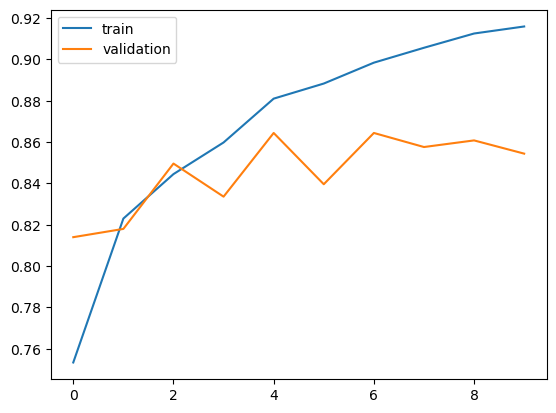

In [119]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


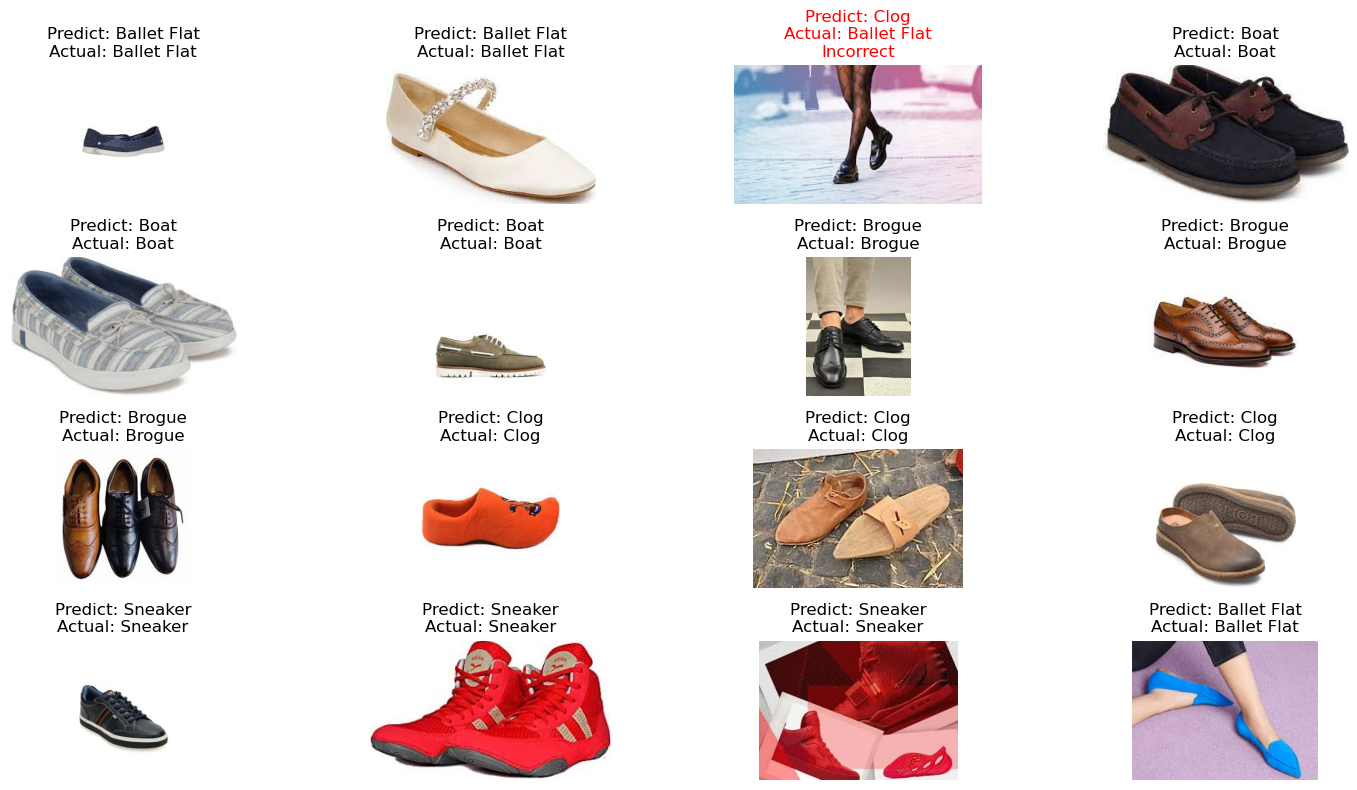

In [141]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet import preprocess_input

# 이미지 로드 및 전처리
IMAGE_DIR = './datasets/Shoes Dataset/Valid/'
IMAGE_SIZE = 224
class_names = ['Ballet Flat', 'Boat', 'Brogue', 'Clog', 'Sneaker']

def load_random_images(image_dir, class_names, num_images=16):
    images_per_class = num_images // len(class_names)
    remainder = num_images % len(class_names)

    images = []
    labels = []

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpeg')]
        selected_images = random.sample(all_images, min(images_per_class, len(all_images)))

        images.extend(selected_images)
        labels.extend([class_name] * len(selected_images))

    # 추가로 필요한 이미지를 무작위로 선택
    if remainder > 0:
        additional_images = []
        additional_labels = []
        for class_name in class_names:
            class_dir = os.path.join(image_dir, class_name)
            all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpeg')]
            additional_images.extend(random.sample(all_images, min(remainder, len(all_images))))
            additional_labels.extend([class_name] * min(remainder, len(all_images)))
            remainder -= len(additional_images)
            if remainder <= 0:
                break
        images.extend(additional_images)
        labels.extend(additional_labels)

    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 20개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=16)

# Predict and visualize the results
plt.figure(figsize=(15, 8))  
for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=64)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    # Visualize the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(4, 4, idx + 1) 
    plt.imshow(image)
    actual_class_name = random_labels[idx]
    title_text = f"Predict: {predicted_class_name}\nActual: {actual_class_name}"
    if predicted_class_name != actual_class_name:
        title_text += "\nIncorrect"
        plt.title(title_text, color='red')  # 틀린 예측은 빨간색으로 표시
    else:
        plt.title(title_text)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 📍Fine Tuning 진행 결과
- 이전보다 정확도가 소폭 하락하고 손실값이 소폭 상승하였지만, 각 epoch당 소요시간이 적게는 1/2배에서 많게는 1/3배까지 줄은 것을 볼 수 있었다.
- 또한, 실제 예측을 진행해 보았을 때, 0.9정도의 정확도임을 확인하였다.
- 해당 데이터는 사전 훈련 모델 중 하나인 mobilenet과 유사도가 꽤 높으며, 데이터 양도 많았다.
- 따라서 일부 layer를 훈련시키고 나머지는 freeze 시키는 미세 조정을 통해 훈련함으로써 성능의 하락을 최소화하고, 소요 시간을 단축시키는 좋은 모델로 학습 시킬 수 있었다.

| Fine Tuning  | 데이터 세트 | 정확도 | 손실값   |
|--------|-------------|--------|--------|
| 전 | 훈련 데이터 | 0.9661 | 0.1139 |
|    | 검증 데이터 | 0.8624 | 0.6607 |
|    | 테스트 데이터 | 0.8445 | 0.8761 |
| 후 | 훈련 데이터 | 0.9196 | 0.2518 |
|    | 검증 데이터 | 0.8544 | 0.4480 |
|    | 테스트 데이터 | 0.8300 | 0.6342 |